In [1]:
# ЗаданиеДан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
# Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

# Признаки:
#     1.satisfaction_level​ - Уровень удовлетворенности работой
#     2.Last_evaluation ​- Время с момента последней оценки в годах
#     3.number_projects​ - Количество проектов, выполненных за время работы
#     4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
#     5.time_spend_company​ - Стаж работы в компании в годах
#     6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
#     7.left​ - уволился ли сотрудник
#     8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
#     9.department ​- отдел в котором работает сотрудник
#     10.salary​ - относительный уровень зарплатыТребуется выполнить следующее задание:
#         1Загрузите файл HR.csv в pandas dataframe
#         2Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
#         3Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
#         Определите две самые скоррелированные и две наименеескоррелированные переменные.
#         4Рассчитайте сколько сотрудников работает в каждомдепартаменте.
#         5Показать распределение сотрудников по зарплатам.
#         6Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности
#         7Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, 
#          чем сотрудники с низкимокладом
#         8Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
#             ●Доля сотрудников с повышением за последние 5 лет
#             ●Средняя степень удовлетворенности
#             ●Среднее количество проектов
#         9Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, 
#         предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary)
#         Оценить качество модели на тестовой выборки
#         10Загрузить jupyter notebook с решение на github и прислать ссылку

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
# Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')
df = df.rename(columns = {'sales': 'department'}, inplace = False)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)
df_statistics = pd.DataFrame()
df_statistics['Mean'] = df.mean()
df_statistics['Median'] = df.median()
df_statistics['Mode'] = df.mode(numeric_only=True, axis=0).iloc[0]
df_statistics['Min'] = df.min(numeric_only=True)
df_statistics['Max'] = df.max(numeric_only=True)
df_statistics['Mean deviation'] = df.mad()
df_statistics['Standard deviation'] = df.std()
df_statistics

,Mean,Median,Mode,Min,Max,Mean deviation,Standard deviation
satisfaction_level,0.612834,0.64,0.10,0.09,1.0,0.206911,0.248631
last_evaluation,0.716102,0.72,0.55,0.36,1.0,0.150389,0.171169
number_project,3.803054,4.00,4.00,2.00,7.0,1.008344,1.232592
average_montly_hours,201.050337,200.00,135.00,96.00,310.0,43.671320,49.943099
time_spend_company,3.498233,3.00,3.00,2.00,10.0,1.076123,1.460136
Work_accident,0.144610,0.00,0.00,0.00,1.0,0.247395,0.351719
left,0.238083,0.00,0.00,0.00,1.0,0.362798,0.425924
promotion_last_5years,0.021268,0.00,0.00,0.00,1.0,0.041632,0.144281


<AxesSubplot:>

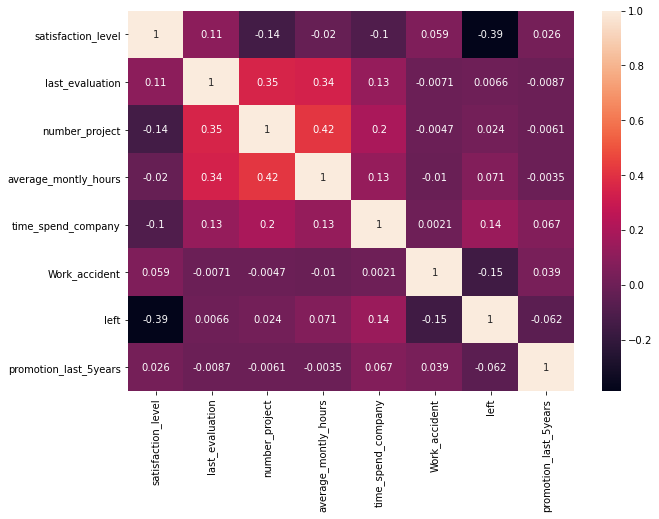

In [5]:
# Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименеескоррелированные переменные.
plt.subplots(figsize=(10, 7))
sn.heatmap(df.loc[:, ~df.columns.isin(['department', 'salary'])].corr(), annot=True)

In [6]:
# Вывод: 
# 2 самых скоррелированных параметра:
#     (satisfaction_level - left) - показывает, что с ростом уровня удовлетворенности снижается риск ухода
#     (number_project - average_montly_hours) - очевидно, что чем больше проектов, тем больше рабочих часов, я бы удалил один 
#     из параметров, т.к. они закорреллированы.

# 2 самых наименеескоррелированных параметра:
#     (average_montly_hours - promotion_last_5years) - продвижение за последние 5 лет никак не влияет на количество рабочих часов
#     (time_spend_company - Work_accident) - опыт (время работы в компании) не влияет на количество инцидентов
    
# В целом, исходя из коэффициентов корреляции, можно сделать следующие выводы:
#     1. Продвижение по работе за последние 5 лет - не влияет ни на что. Кандидат на удаление.
#     2. С ростом уровня удовлетворенности снижается риск ухода.
#     3. В свою очередь, на уровень удовлетворенности не заничетельно влияет количество проектов (чем больше проектов - 
#                                                                                                тем ниже уровень удовлетворения).
#     4. Чем больше проектов, тем больше рабочих часов. Количество рабочих часов - кандидат на удаление.
#     5. Большее количество проектов у тех, кто дольше работает в компании.

In [7]:
# Рассчитайте сколько сотрудников работает в каждом департаменте
df_departments = df.groupby(by='department').size().reset_index(name='counts').sort_values('counts', ascending=False)
df_departments

,department,counts
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


In [8]:
# Показать распределение сотрудников по зарплатам
df_salary = df.groupby(by='salary').size().reset_index(name='counts').sort_values('counts', ascending=False)
df_salary

,salary,counts
1,low,7316
2,medium,6446
0,high,1237


In [ ]:
# Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности
df_departments_salary = df.groupby(by=['department', 'salary']).size().reset_index(name='counts').sort_values(['department', 'counts'], ascending=False)
df_departments_salary

In [ ]:
# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом
# df_time_at_work_and_salary = df[['salary', 'average_montly_hours']]
df_time_at_work_and_salary = df.loc[df['salary'] != "medium", ['salary', 'average_montly_hours']]
df_time_at_work_and_high_salary = df_time_at_work_and_salary.loc[df['salary'] == "high", ["average_montly_hours"]]
df_time_at_work_and_low_salary = df_time_at_work_and_salary.loc[df['salary'] == "low", ["average_montly_hours"]]
df_time_at_work_and_high_salary.hist(label="high_salary", color="r")
plt.legend()
df_time_at_work_and_low_salary.hist(label="low_salary", color="g")
plt.legend()

In [ ]:
# H0: время проводимое на работе НЕ ОТЛИЧАЕТСЯ от уровня заработной платы
# H1: время проводимое на работе ОТЛИЧАЕТСЯ от уровня заработной платы

In [ ]:
# Т-Тест Стьюдента
alpha = 0.05
result = sts.ttest_ind(df_time_at_work_and_high_salary, df_time_at_work_and_low_salary, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, время проводимое на работе ОТЛИЧАЕТСЯ от уровня заработной платы')
else:
    print('Не отвергаем нулевую гипотезу, время проводимое на работе НЕ ОТЛИЧАЕТСЯ от уровня заработной платы')

In [ ]:
# Вывод: 
# гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом НЕ ПОДТВЕРЖДАЕТСЯ

In [ ]:
# Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
# ● Доля сотрудников с повышением за последние 5 лет
# ● Средняя степень удовлетворенности
# ● Среднее количество проектов

In [ ]:
# Доля сотрудников с повышением за последние 5 лет
df_fire_workers_with_promotion = (df.groupby(by=['left', 'promotion_last_5years'])
                                   .size()
                                   .reset_index(name='counts')
                                   .sort_values(['left', 'counts'], ascending=False))
df_fire_workers_with_promotion['counts'] = (round(df_fire_workers_with_promotion['counts'] / 
                                                  df['promotion_last_5years'].count() * 100, 1))
df_fire_workers_with_promotion = (df_fire_workers_with_promotion
                                  .loc[df_fire_workers_with_promotion['promotion_last_5years'] == 1, ['left', 'counts']])
df_fire_workers_with_promotion

In [ ]:
# Средняя степень удовлетворенности
df_fire_workers_with_satisfaction = df[['left', 'satisfaction_level']].groupby(by=['left']).mean()
df_fire_workers_with_satisfaction

In [ ]:
# Среднее количество проектов
df_fire_workers_with_projects = df[['left', 'number_project']].groupby(by=['left']).mean()
df_fire_workers_with_projects

In [ ]:
# Разделить данные на тестовую и обучающую выборки. Построить модель LDA, 
# предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary)
# Оценить качество модели на тестовой выборки

# Линейно-дискреминантный анализ
df_train, df_test = train_test_split(df.loc[:, ~df.columns.isin(['department', 'salary'])], test_size=0.3)
y_train, y_test = df_train['left'], df_test['left']
del df_train['left']
del df_test['left']
lda = LinearDiscriminantAnalysis()
lda.fit(df_train, y_train)
print(f'Accuracy score based on TRAIN sample {round(accuracy_score(y_train, lda.predict(df_train)), 2)}\n')
print(f'Accuracy score based on TEST sample {round(accuracy_score(y_test, lda.predict(df_test)), 2)}\n')

print("Confusion matrix показывает, что количество истинно отрицательных - максимальное, \n\
что указывает о высокой точности предсказаний, что сотрудник уволиться.")
sn.heatmap(confusion_matrix(y_test, 
                 lda.predict(df_test), 
                 labels=[1, 0],
                 normalize='pred'), annot=True)

In [ ]:
# Логистическая регрессия

clf = LogisticRegression(random_state=42, max_iter=1000).fit(df_train, y_train)
print(f'Accuracy score based on TRAIN sample {round(clf.score(df_train, y_train), 2)}\n')
print(f'Accuracy score based on TEST sample {round(clf.score(df_test, y_test), 2)}\n')

print("Confusion matrix показывает, что количество истинно отрицательных - максимальное, \n\
что указывает о высокой точности предсказаний, что сотрудник уволиться.")
sn.heatmap(confusion_matrix(y_test, 
                 clf.predict(df_test), 
                 labels=[1, 0],
                 normalize='pred'), annot=True)

In [9]:
# Логистическая регрессия

clf = LogisticRegression(random_state=42, max_iter=1000).fit(df_train, y_train)
print(f'Accuracy score based on TRAIN sample {round(clf.score(df_train, y_train), 2)}\n')
print(f'Accuracy score based on TEST sample {round(clf.score(df_test, y_test), 2)}\n')

print("Confusion matrix показывает, что количество истинно отрицательных - максимальное, \n\
что указывает о высокой точности предсказаний, что сотрудник уволиться.")
sn.heatmap(confusion_matrix(y_test, 
                 clf.predict(df_test), 
                 labels=[1, 0],
                 normalize='pred'), annot=True)

,department,salary,counts
28,technical,low,1372
29,technical,medium,1147
27,technical,high,201
25,support,low,1146
26,support,medium,942
24,support,high,141
22,sales,low,2099
23,sales,medium,1772
21,sales,high,269
19,product_mng,low,451


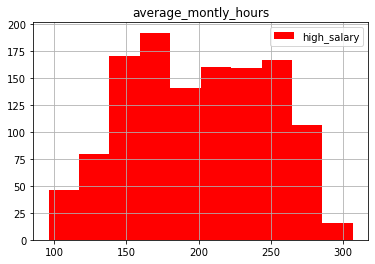

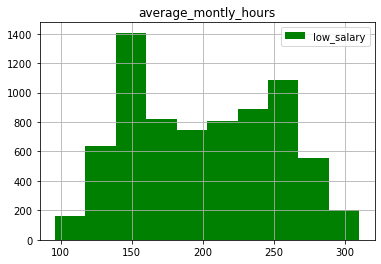

In [10]:
# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом
# df_time_at_work_and_salary = df[['salary', 'average_montly_hours']]
df_time_at_work_and_salary = df.loc[df['salary'] != "medium", ['salary', 'average_montly_hours']]
df_time_at_work_and_high_salary = df_time_at_work_and_salary.loc[df['salary'] == "high", ["average_montly_hours"]]
df_time_at_work_and_low_salary = df_time_at_work_and_salary.loc[df['salary'] == "low", ["average_montly_hours"]]
df_time_at_work_and_high_salary.hist(label="high_salary", color="r")
plt.legend()
df_time_at_work_and_low_salary.hist(label="low_salary", color="g")
plt.legend()

In [11]:
# H0: время проводимое на работе НЕ ОТЛИЧАЕТСЯ от уровня заработной платы
# H1: время проводимое на работе ОТЛИЧАЕТСЯ от уровня заработной платы

In [12]:
# Т-Тест Стьюдента
alpha = 0.05
result = sts.ttest_ind(df_time_at_work_and_high_salary, df_time_at_work_and_low_salary, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, время проводимое на работе ОТЛИЧАЕТСЯ от уровня заработной платы')
else:
    print('Не отвергаем нулевую гипотезу, время проводимое на работе НЕ ОТЛИЧАЕТСЯ от уровня заработной платы')

Ttest_indResult(statistic=array([-0.76243317]), pvalue=array([0.44590455]))
Не отвергаем нулевую гипотезу, время проводимое на работе НЕ ОТЛИЧАЕТСЯ от уровня заработной платы


In [13]:
# Вывод: 
# гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом НЕ ПОДТВЕРЖДАЕТСЯ

In [14]:
# Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
# ● Доля сотрудников с повышением за последние 5 лет
# ● Средняя степень удовлетворенности
# ● Среднее количество проектов

In [15]:
# Доля сотрудников с повышением за последние 5 лет
df_fire_workers_with_promotion = (df.groupby(by=['left', 'promotion_last_5years'])
                                   .size()
                                   .reset_index(name='counts')
                                   .sort_values(['left', 'counts'], ascending=False))
df_fire_workers_with_promotion['counts'] = (round(df_fire_workers_with_promotion['counts'] / 
                                                  df['promotion_last_5years'].count() * 100, 1))
df_fire_workers_with_promotion = (df_fire_workers_with_promotion
                                  .loc[df_fire_workers_with_promotion['promotion_last_5years'] == 1, ['left', 'counts']])
df_fire_workers_with_promotion

,left,counts
3,1,0.1
1,0,2.0


In [16]:
# Средняя степень удовлетворенности
df_fire_workers_with_satisfaction = df[['left', 'satisfaction_level']].groupby(by=['left']).mean()
df_fire_workers_with_satisfaction

,satisfaction_level
left,
0,0.666810
1,0.440098


In [17]:
# Среднее количество проектов
df_fire_workers_with_projects = df[['left', 'number_project']].groupby(by=['left']).mean()
df_fire_workers_with_projects

,number_project
left,
0,3.786664
1,3.855503


Accuracy score based on TRAIN sample 0.76

Accuracy score based on TEST sample 0.76

Confusion matrix показывает, что количество истинно отрицательных - максимальное, 
что указывает о высокой точности предсказаний, что сотрудник уволиться.


<AxesSubplot:>

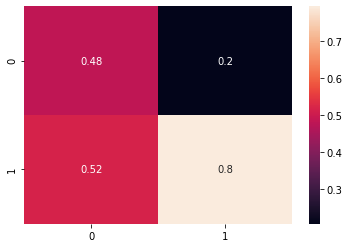

In [18]:
# Разделить данные на тестовую и обучающую выборки. Построить модель LDA, 
# предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary)
# Оценить качество модели на тестовой выборки

# Линейно-дискреминантный анализ
df_train, df_test = train_test_split(df.loc[:, ~df.columns.isin(['department', 'salary'])], test_size=0.3)
y_train, y_test = df_train['left'], df_test['left']
del df_train['left']
del df_test['left']
lda = LinearDiscriminantAnalysis()
lda.fit(df_train, y_train)
print(f'Accuracy score based on TRAIN sample {round(accuracy_score(y_train, lda.predict(df_train)), 2)}\n')
print(f'Accuracy score based on TEST sample {round(accuracy_score(y_test, lda.predict(df_test)), 2)}\n')

print("Confusion matrix показывает, что количество истинно отрицательных - максимальное, \n\
что указывает о высокой точности предсказаний, что сотрудник уволиться.")
sn.heatmap(confusion_matrix(y_test, 
                 lda.predict(df_test), 
                 labels=[1, 0],
                 normalize='pred'), annot=True)

Accuracy score based on TRAIN sample 0.77

Accuracy score based on TEST sample 0.76

Confusion matrix показывает, что количество истинно отрицательных - максимальное, 
что указывает о высокой точности предсказаний, что сотрудник уволиться.


<AxesSubplot:>

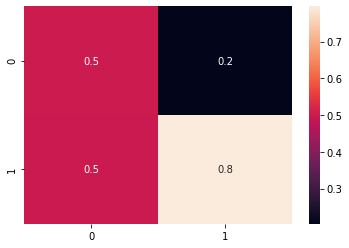

In [19]:
# Логистическая регрессия

clf = LogisticRegression(random_state=42, max_iter=1000).fit(df_train, y_train)
print(f'Accuracy score based on TRAIN sample {round(clf.score(df_train, y_train), 2)}\n')
print(f'Accuracy score based on TEST sample {round(clf.score(df_test, y_test), 2)}\n')

print("Confusion matrix показывает, что количество истинно отрицательных - максимальное, \n\
что указывает о высокой точности предсказаний, что сотрудник уволиться.")
sn.heatmap(confusion_matrix(y_test, 
                 clf.predict(df_test), 
                 labels=[1, 0],
                 normalize='pred'), annot=True)